# Calculation code

In [29]:
from skyfield.api import EarthSatellite
from skyfield.api import load, wgs84

ts = load.timescale()
line1 = '1  6235U 72082A   23049.77077049 -.00000017  00000-0  18238-3 0  9998'
line2 = '2  6235 101.9830  38.7903 0003935 327.4674 206.3569 12.53157847303058'
satellite = EarthSatellite(line1, line2, 'NOAA 2 (ITOS-D)', ts)

t = ts.now()
geocentric = satellite.at(t) # Position
print(geocentric)
print('Position components (NOAA2):', geocentric.position.km)       # x, y, z relative to GCRS
print('Velocity components (NOAA2):', geocentric.velocity.km_per_s) # Velocity compotents relative to GCRS
print('Speed (NOAA2):', geocentric.speed().km_per_s) # Просто корень из суммы квадратов velocity
print()
lat, lon = wgs84.latlon_of(geocentric)
height =   wgs84.height_of(geocentric)
print('Height of NOAA:', height.km)
print('Latitude of NOAA:', lat)
print('Longitude of NOAA:', lon)
print()
from skyfield.api import N,S,E,W
# Широта и долгода Долгопы, взятая с yandex maps
LK = wgs84.latlon(55.930171 * N, 37.518219 * W, elevation_m=172) # 173, 180
ICRS_LK = LK.at(ts.now())
print(ICRS_LK)
print('Position components (ЛК):', ICRS_LK.position.km)

# .center = origin of vector
# .target = destination of vector
# 399 at center = Earth
dist = (geocentric - ICRS_LK).distance().km
print('NOAA2 & LK distance:', dist)
print()
print('RELATIVE POSITIONING (WHICH DIRECTION TO LOOK)')
difference = satellite - LK    # Relative position obtained via vector substraction
topocentric = difference.at(t) # Access this position as plain coords.
# print(topocentric.distance().km) # Same as dist
alt, az, distance = topocentric.altaz() # Altitude & Azimuth
if alt.degrees > 0:
    print('The ISS is above the horizon')

print('Altitude:', alt)
print('Azimuth:', az)
print('Distance: {:.1f} km'.format(distance.km))

<Geocentric ICRS position and velocity at date t center=399 target=-106235>
Position components (NOAA2): [-2177.42954832   233.96097819 -7522.95677264]
Velocity components (NOAA2): [ 5.08298244  4.81598598 -1.31918331]
Speed (NOAA2): 7.1253544458565266

Height of NOAA: 1476.8372867216376
Latitude of NOAA: -73deg 58' 46.2"
Longitude of NOAA: -129deg 39' 55.4"

<Geocentric ICRS position and velocity at date t center=399 target=WGS84 latitude +55.9302 N longitude -37.5182 E elevation 172.0 m>
Position components (ЛК): [ -240.52474607 -3572.31969693  5260.89615514]
NOAA2 & LK distance: 13478.362974406296

RELATIVE POSITIONING (WHICH DIRECTION TO LOOK)
Altitude: -69deg 44' 45.0"
Azimuth: 207deg 44' 20.3"
Distance: 13478.4 km


# Graphing the data

https://matplotlib.org/2.0.2/mpl_toolkits/mplot3d/tutorial.html  
https://matplotlib.org/stable/gallery/mplot3d/index.html

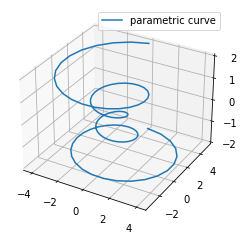

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)
ax.plot(x, y, z, label='parametric curve')
ax.legend()

plt.show()

https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

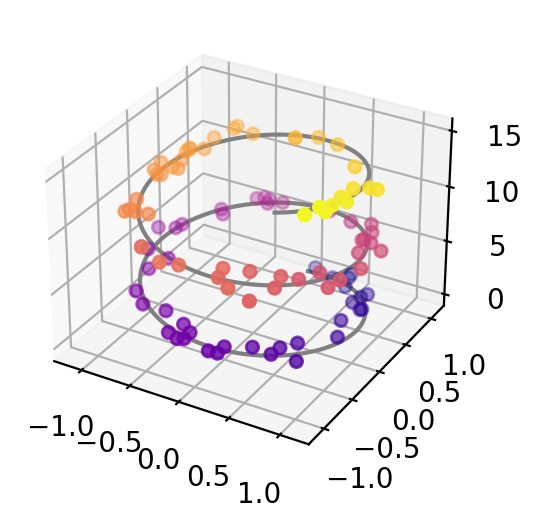

In [42]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(3,3), dpi=200)
ax =  plt.axes(projection='3d')

zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray') # Might as well just ax.plot(...)
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='plasma');

# Ресурсы

## Skyfield library


- Работа с TLE: https://rhodesmill.org/skyfield/earth-satellites.html  

The simplest form in which you can generate a satellite position is to call its at() method, which will return an (x,y,z) position relative to the Earth’s center in the Geocentric Celestial Reference System. (GCRS coordinates are based on even more precise axes than those of the old J2000 system.)

Once you have computed a geocentric satellite position, you can use either of several wgs84 object methods to learn the satellite’s latitude, longitude, and height:  
latlon_of()  
height_of()  
geographic_position_of()  
...
- Что такое position: https://rhodesmill.org/skyfield/positions.html
- Какие системы координаты есть: https://rhodesmill.org/skyfield/coordinates.html

## Что-то на русском
https://gis-lab.info/qa/python-orbital-tracks.html

### Reference frames table
|  ITRF() | ECEF |   International Terrestrial Reference Frame |   |   |
|--------:|-----:|--------------------------------------------:|---|---|
|   PEF() | ECEF |          Pseudo-Earth Fixed reference frame |   |   |
|  TIRS() | ECEF |   Terrestrial Intermediate Reference System |   |   |
|   MOD() |  ECI |                Mean-Of-Date reference frame |   |   |
|   TOD() |  ECI |                True-Of-Data reference frame |   |   |
|  **GCRF()** |  **ECI** | **Geocentric Celestial Reference Frame (GCRF)** |   |   |
| J2000() |  ECI |                       J2000 reference frame |   |   |
|  TEME() |  ECI |  True Equator, Mean Equinox reference frame |   |   |
|  CIRS() |  ECI |      Celetial Intermediate Reference System |   |   |
### Reference frames with pictures
https://ai-solutions.com/_help_Files/orbit_reference_frames.htm
### Libs
polyastro, pyorbital, sgp4, skyfield

In [12]:
from sgp4.api import Satrec
from sgp4.api import jday

# NOAA 2 (ITOS-D)
s = '1  6235U 72082A   23049.77077049 -.00000017  00000-0  18238-3 0  9998'
t = '2  6235 101.9830  38.7903 0003935 327.4674 206.3569 12.53157847303058'

sattelite = Satrec.twoline2rv(s, t)
# Julian date converter:    https://www.aavso.org/jd-calculator
jd, fr    = 2459996.50000, 0.0  # 2459996.50000 for Feb 21st, 2023
# jd, fr    = jday(2023, 2, 20, 17, 0, 0) 
e, r, v = sattelite.sgp4(jd, fr)
print(e, r, v)



# SATT. INFO:
#from sys import stdout
#from sgp4.conveniences import dump_satrec
#stdout.writelines(dump_satrec(sattelite))

0 (-4337.845351546508, -4965.135331350194, 4224.124233937398) (-3.783030444555722, -1.656683780754081, -5.817982321623896)


- r measures the satellite position in kilometers from the center of the earth in the idiosyncratic True Equator Mean Equinox coordinate frame used by SGP4.
- v velocity is the rate at which the position is changing, expressed in kilometers per second.